# Tool use basics

## Learning goals
* Understand what tool use is
* Explain use cases for tool use
* Understand the high-level process of tool use with Claude

## What is tool use?
Tool use, also known as function calling, refers to the ability to extend Claude's capabilities by defining and invoking external tools or functions. We can give Claude access to a set of predefined tools that it can invoke at any point.  Tools allow us to write code that can perform specific tasks or computations that Claude wouldn't be able to do otherwise. In short: tool use is a way of enhancing Claude's functionality.

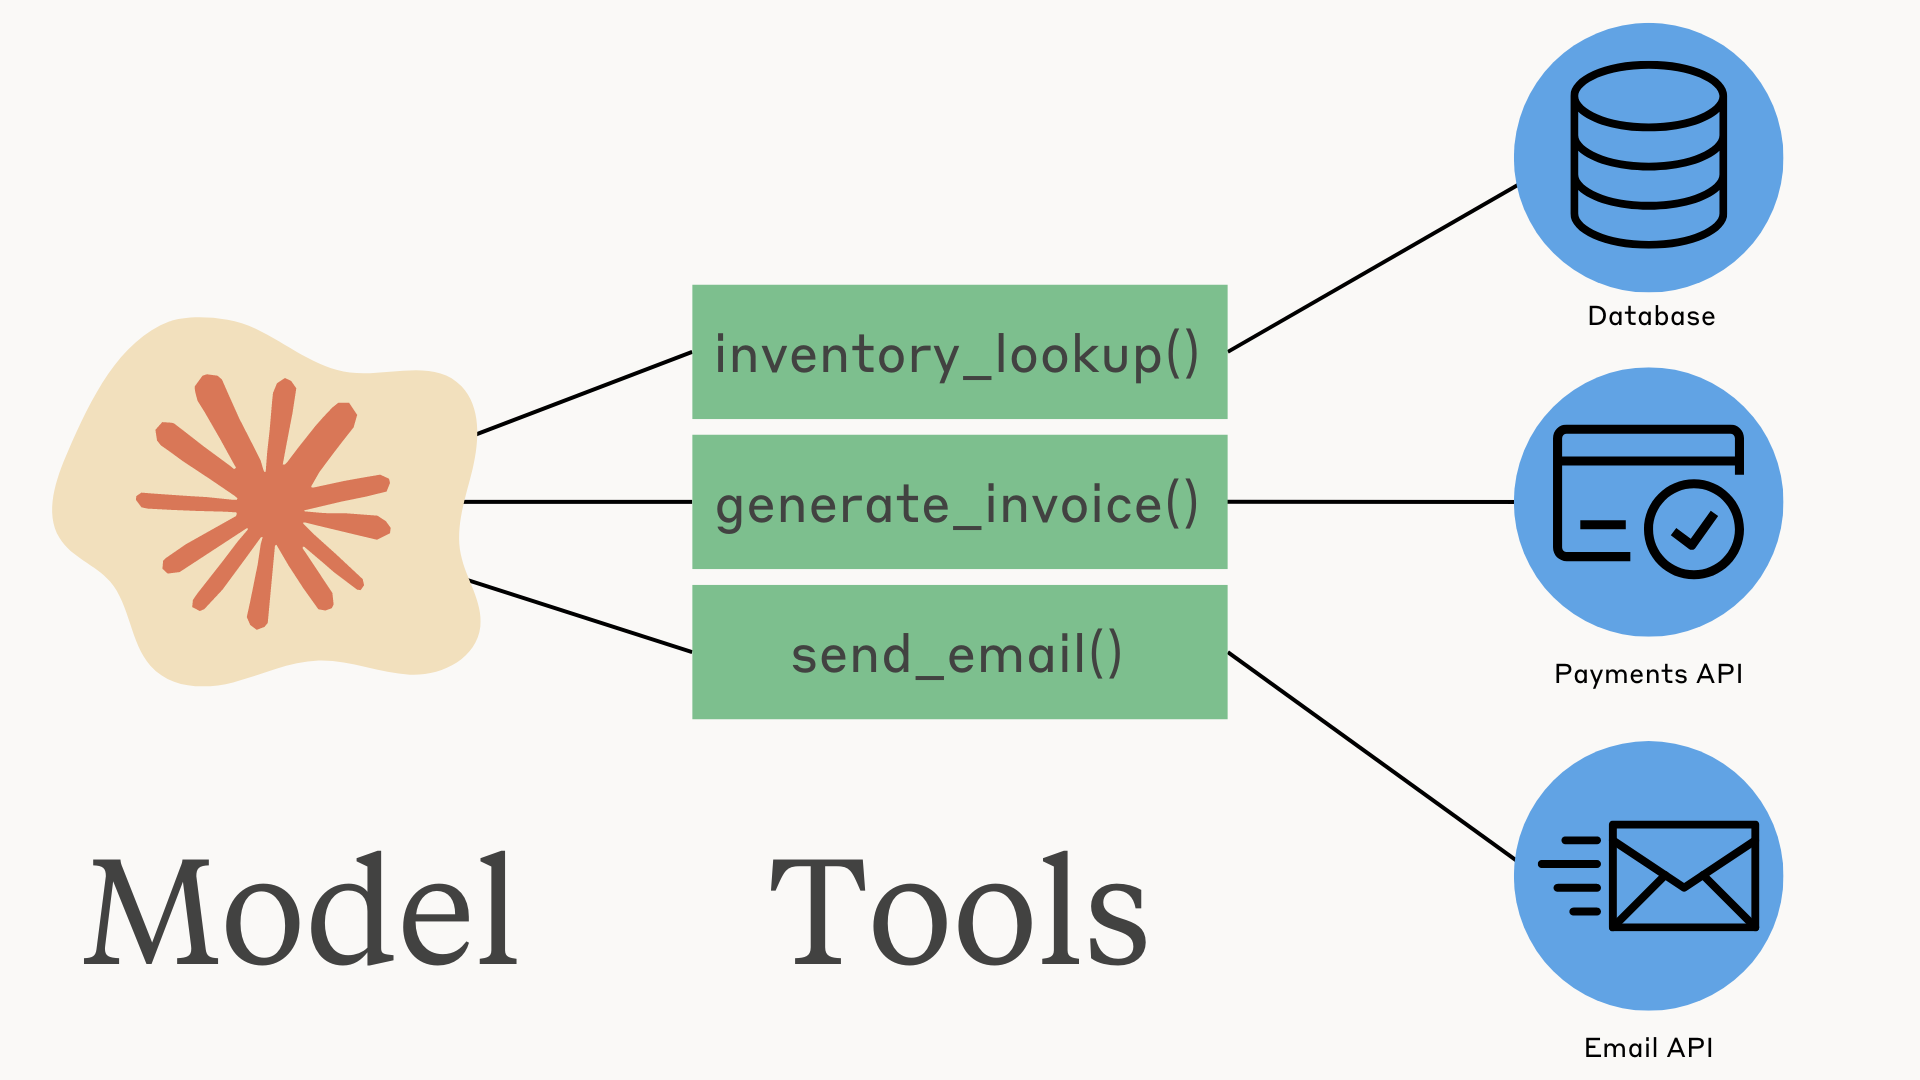

## Why does this matter?
Tool use is a game-changing feature that unlocks the true potential of Claude and opens up a world of possibilities. It's a critical component that can significantly enhance the value and impact of your applications.

* **Extend Claude's capabilities** 
  * Tool use allows you to extend Claude's capabilities beyond its built-in functionality. By defining and invoking external tools, you can enable Claude to perform tasks that it wouldn't be able to do otherwise. This means you can create more powerful and versatile applications that can handle a wider range of user needs and requirements.
* **Integrate with your existing systems**
  * Tool use enables seamless integration between Claude and your existing systems, databases, or APIs. You can define tools that interact with your backend services, retrieve data from your databases, or trigger actions in your applications. This integration allows you to leverage the power of Claude while working with your existing infrastructure and data.
* **Automate complex tasks**
  * With tool use, you can automate complex tasks and workflows that involve multiple steps or require specialized computations. By defining tools that encapsulate these tasks, you can streamline your processes, reduce manual effort, and improve efficiency. Claude can intelligently invoke the right tools at the right time, based on user input or predefined conditions.
* **Enhance user experience**
  * Tool use can significantly enhance the user experience of your applications. By providing Claude with access to relevant tools, you can enable it to deliver more accurate, contextual, and personalized responses to user queries. Users can interact with your applications in natural language, and Claude can leverage the tools to provide rich information or perform desired actions on users' behalf.
* **Scale and customize**
  * With tool use, you can scale and customize your applications to meet the evolving needs of your users. As your user base grows or your requirements change, you can easily add new tools or modify existing ones to expand Claude's capabilities. This flexibility allows you to adapt and iterate quickly, ensuring that your applications remain relevant and competitive.

***

## Use case examples

Some general themes we see across our customers using tool use include:

* **Retrieving information**
  * Tools can be used to fetch data from external sources, such as databases, APIs, or web services. For example, a tool could retrieve weather information, stock prices, or news articles based on user input.
* **Performing calculations**
  * Tools can perform complex calculations or mathematical operations that may be beyond Claude's built-in capabilities. This can include financial calculations, scientific computations, or statistical analyses.
* **Manipulating data**
  * Tools can be used to process, transform, or manipulate data in various formats. This can include tasks like data formatting, data extraction, or data conversion.
* **Interacting with external systems**
  * Tools can facilitate interaction with external systems or services, such as sending emails, triggering notifications, or controlling IoT devices.
* **Generating content**
  * Tools can assist in generating specific types of content, such as images, charts, or formatted documents, based on user input or predefined templates.

More specific possible use cases include:

* **Enterprise data integration**: Integrating Claude with enterprise systems like CRM, ERP, and ITSM to retrieve customer data, automate workflows, and provide personalized support.
* **Financial analysis and reporting**: Using Claude and tools to analyze financial data, generate investment reports, assess risks, and ensure regulatory compliance.
* **Healthcare diagnostics and treatment planning**: Integrating Claude with electronic health records (EHR) and medical knowledge bases to assist healthcare professionals in making informed decisions and creating personalized treatment plans.
* **Educational tutoring and content creation**: Leveraging Claude in combination with educational resources and tools to provide personalized tutoring, generate study materials, and adapt to individual learning styles.
* **Legal document analysis and review**: Using Claude and tools to analyze legal documents, extract key information, identify potential issues, and generate summaries to streamline legal processes.
* **Customer support automation**: Integrating Claude with knowledge bases and support ticketing systems to provide automated customer support, troubleshoot issues, and improve response times.
* **Sales and marketing automation**: Combining Claude with tools to analyze customer data, generate personalized marketing content, qualify leads, and optimize sales processes.
* **Software development assistance**: Integrating Claude with IDEs, version control systems, and project management tools to assist developers in writing code, identifying bugs, and managing software projects.
* **Research and innovation**: Leveraging Claude and tools to conduct market research, analyze patent data, generate novel ideas, and drive innovation in various industries.
* **Content creation and optimization**: Using Claude and tools to generate, optimize, and personalize content for various platforms, including websites, social media, and marketing campaigns.


***

## How tool use works

Let's turn our attention to how tool use actually works. The most important thing to understand up front is that Claude isn't *running* any code on its own.  We tell Claude about a set of tools it can ask us to call, and then it's our job to actually run the underlying tool code and tell Claude about the results. 

Note that Claude does not have access to any built-in server-side tools. All tools must be explicitly provided by you, the user, in each API request. This means that you define the available tools, with clear descriptions and input schemas, as well as implements and executes the tool logic, such as running a specific function or querying an API at Claude's request. This gives you full control and flexibility over the tools Claude can use.

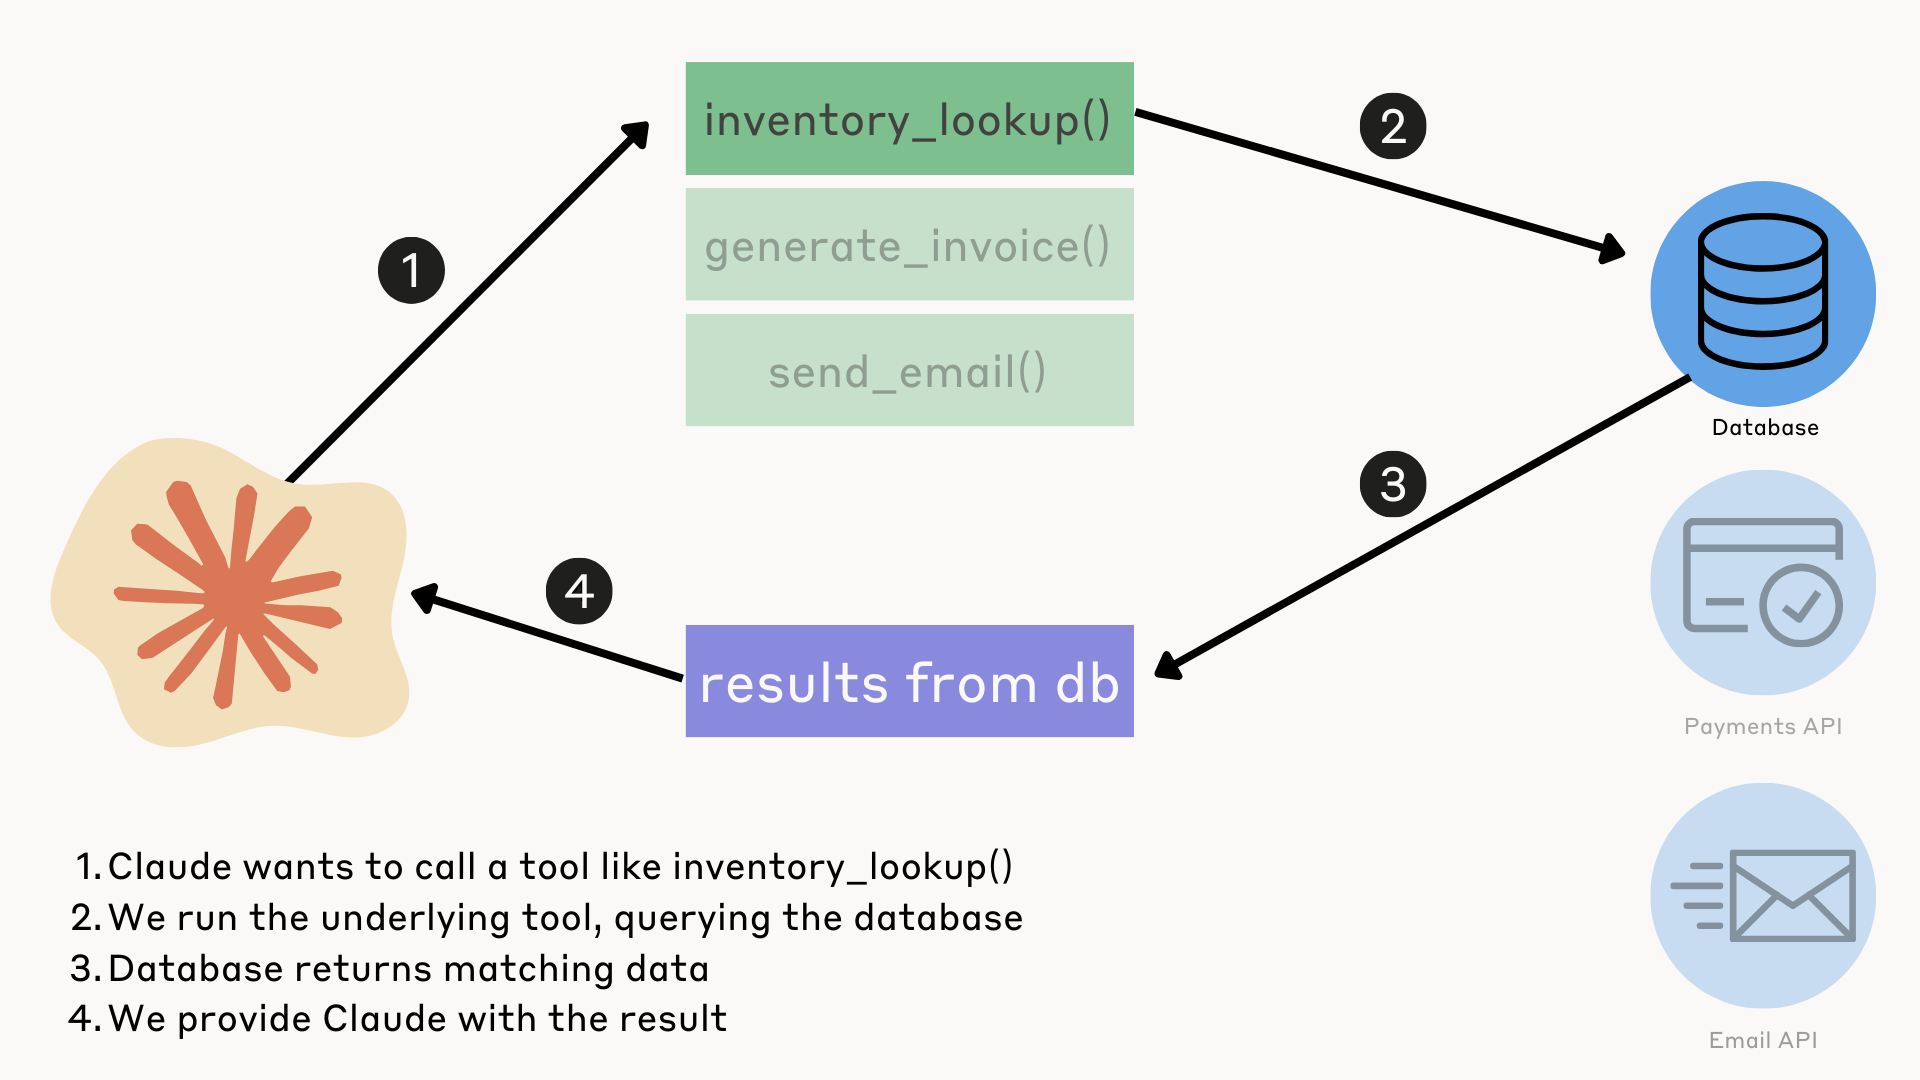

Specifically, using tools with Claude involves the following steps:

1. **Provide Claude with tools and a user prompt:** (API request)
    * Define the set of tools you want Claude to have access to, including their names, descriptions, and input schemas.
    * Provide a user prompt that may require the use of one or more of these tools to answer, such as "How many shares of General Motors can I buy with $500?"

2. **Claude uses a tool:** (API response)
    * Claude assesses the user prompt and decides whether any of the available tools would help with the user's query or task. If so, it also decides which tool(s) to use and with what input(s).
    * Claude outputs a properly formatted tool use request.
    * The API response will have a `stop_reason` of `tool_use`, indicating that Claude wants to use an external tool.

3. **Extract tool input(s), run code, and return results:** (API request)
    * On the client side, you should extract the tool name and input(s) from Claude's tool use request.
    * Run the actual tool code on the client side.
    * Return the results to Claude by continuing the conversation with a new user message containing a `tool_result` content block.

4. **Claude uses the tool result to formulate a response:** (API response)
    * After receiving the tool results, Claude will use that information to formulate its final response to the original user prompt.
    
Steps (3) and (4) are optional — for some workflows, Claude using the tool is all the information you need, and you might not need to return tool results back to Claude. More on that in a later chapter.

### Hypothetical tool use scenario

To better understand the flow of tool use, let's imagine that we are building a chat application that allows users to talk to Claude about the stock market and retrieve current stock prices. 

Of course, Claude doesn't know what stock market conditions and prices are at any given point in time, so we need to provide Claude with a `get_stock_price` tool that retrieves the current stock price for a company.

Here's a simple diagram showing the flow of information between our app and Claude:

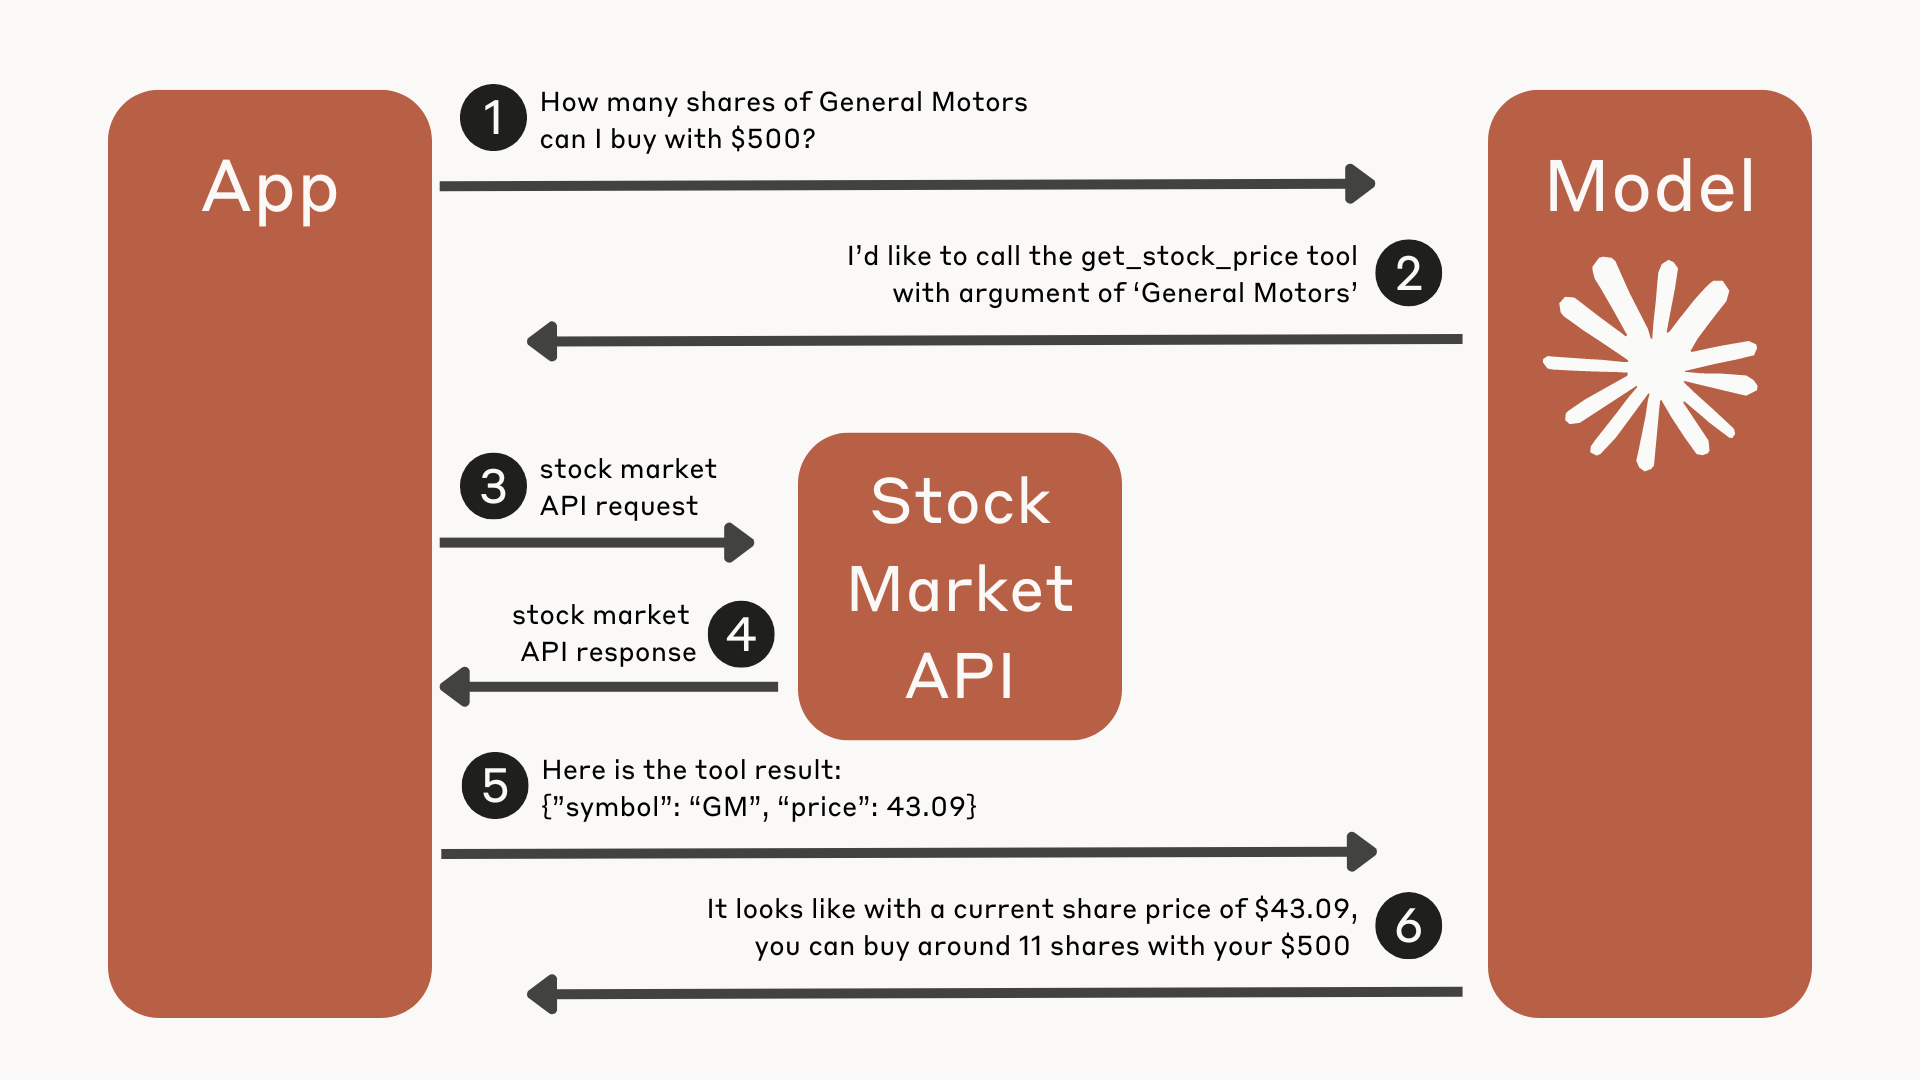

### Detailed breakdown of the process

Below is a detailed breakdown of the tool use steps

#### Step 0: Write the tool functionality

Before we tell Claude about a particular tool it has access to, we need to first write the functionality of that tool.  In the case of our `get_stock_price` tool, we would likely write a function that expects a company name or stock ticker as an argument and then sends a request to a stock market API to get live stock data.  Something like this:

In [ ]:
def get_stock_price(company):
    #Send a request to a stock market API to lookup current stock price for a given company

    #Returns a dictionary containing current stock price information for the specified company

If this function were fully implemented and we were to call it with `get_stock_price("General Motors")` we might get a return value that looks like this: 

In [ ]:
{
  "symbol”: “GM”, 
  "price”: 43.09
}

#### Step 1: Provide Claude with tools and a user prompt (API request)
Next, we need to define the `get_stock_price` tool with its name, description, and input schema.  We'll spend more time on defining tools later, but here's a hypothetical `get_stock_price` tool definition we could tell Claude about:

In [ ]:
tool_definition = {
    "name": "get_stock_price",
    "description": "Retrieves the current stock price for a given company",
    "input_schema": {
        "type": "object",
        "properties": {
            "company": {
                "type": "string",
                "description": "The company name to fetch stock data for"
            }
        },
        "required": ["company"]
    }
}

Next, we would tell Claude that this tool exists and make a request with a prompt that might require this tool:

In [ ]:
response = client.messages.create(
    model="claude-3-opus-20240229",
    messages=[{"role": "user", "content": "How many shares of General Motors can I buy with $500?"}],
    max_tokens=500,
    tools=[tool_definition]
)

#### Step 2: Claude uses a tool (API response)

Claude receives the API request and assesses the user prompt. It determines that the `get_stock_price` tool would be helpful in answering the question about buying shares of General Motors.

Claude responds with a properly formatted tool use request.  We'll dive deeper into this later, but here's an example response from Claude indicating that it "wants" to use our tool:

In [ ]:
{
  "stop_reason": "tool_use",
  "tool_use": {
    "name": "get_stock_price",
    "input": {
      "company": "General Motors"
    }
  }
}

#### Step 3: Extract tool input, run code, and return results (API request)

On the client side, we extract the tool name (`get_stock_price`) and input company name (`General Motors`) from Claude's tool use request.

We execute the actual `get_stock_price` function that gets live stock market data from an API using the inputs extracted from Claude’s tool request. The function might return data that looks like this:

In [ ]:
{
  "symbol”: “GM”, 
  "price”: 43.09
}

We then tell Claude about the result of our tool. We return the stock price tool results to Claude by continuing the conversation with a new user message containing a `tool_result` content block (more on that later).

#### Step 4: Claude uses tool result to formulate a response (API response)

Claude receives the stock price tool result and incorporates the live stock market information into its final response to the original user prompt, finally responding back with something like:

>It looks like with a current share price of $43.09, you can buy around 11 shares of General Motors stock with your $500.

***

## Quiz

### Question 1

Which of the following use cases might be a good fit for tool use?

* **(a)** A customer support chatbot that needs to retrieve order information from a database based on a customer's order ID.
* **(b)** A writing assistant that helps users improve their grammar and writing style.
* **(c)** A financial advisor that provides personalized investment recommendations based on a user's risk tolerance and financial goals.
* **(d)** A travel chatbot that can book flights and hotels based on user preferences and availability.

<details>
  <summary>View question 1 answer</summary>
  
  **a, c, and d**

* (a) A customer support chatbot that needs to retrieve order information from a database based on a customer's order ID.
* (c) A financial advisor that provides personalized investment recommendations based on a user's risk tolerance and financial goals.
* (d) A travel chatbot that can book flights and hotels based on user preferences and availability.

These use cases involve retrieving information from external sources, performing calculations or data manipulation, and interacting with external systems, which are all common scenarios where tool use can enhance Claude's functionality.

Use case (b) might not necessarily require tool use, as it could potentially be handled by Claude's built-in language understanding and generation capabilities.
  
</details>

### Question 2

Put the following steps of the tool use flow in the correct order:
* **(a)** Claude uses the tool result to formulate a response to the original user prompt.
* **(b)** The client-side code extracts the tool name and input from Claude's tool use request.
* **(c)** Claude assesses the user prompt and decides to use a tool and outputs a tool use request
* **(d)** The client-side code executes the actual tool functionality and returns the results to Claude.
* **(e)** The client-side code provides Claude with a set of available tools and a user prompt.

<details>
  <summary>View question 2 answer</summary>
  
  **The correct order is e, c, b, d, a**

1. (e) The client-side code provides Claude with a set of available tools and a user prompt.
2. (c) Claude assesses the user prompt and decides to use a tool and outputs a tool use request.
3. (b) The client-side code extracts the tool name and input from Claude's tool use request.
4. (d) The client-side code executes the actual tool functionality and returns the results to Claude.
5. (a) Claude uses the tool result to formulate a response to the original user prompt.
</details>
